In [1]:
import numpy as np
import pandas as pd

## Load the dataset using Pandas

In [2]:
student_math = pd.read_csv("dataset/student-mat.csv")

In [3]:
student_portugese = pd.read_csv("dataset/student-por.csv")

In [4]:
student_merge = student_math.append(student_portugese)
student_merge

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
student_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher   

## Remove columns that are not going to be used

In [6]:
def removeColumns(df):
    columnsToDrop = ["school", "address", "reason", "guardian", "traveltime", "paid", "nursery"]
    for column in columnsToDrop:
        df.drop(column, axis=1, inplace=True)

In [7]:
removeColumns(student_merge)
student_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         1044 non-null   object
 1   age         1044 non-null   int64 
 2   famsize     1044 non-null   object
 3   Pstatus     1044 non-null   object
 4   Medu        1044 non-null   int64 
 5   Fedu        1044 non-null   int64 
 6   Mjob        1044 non-null   object
 7   Fjob        1044 non-null   object
 8   studytime   1044 non-null   int64 
 9   failures    1044 non-null   int64 
 10  schoolsup   1044 non-null   object
 11  famsup      1044 non-null   object
 12  activities  1044 non-null   object
 13  higher      1044 non-null   object
 14  internet    1044 non-null   object
 15  romantic    1044 non-null   object
 16  famrel      1044 non-null   int64 
 17  freetime    1044 non-null   int64 
 18  goout       1044 non-null   int64 
 19  Dalc        1044 non-null   int64 
 20  Walc     

## Add "scoreavg" column
This column contains the average of the first period, second period, and final grades of each student. This data will later be used to categorize how each student performs on a class

In [8]:
def addScoreAvgCol(df):
    df["scoreavg"] = df[["G1", "G2", "G3"]].mean(axis=1)

In [9]:
addScoreAvgCol(student_merge)
student_merge[["G1", "G2", "G3", "scoreavg"]]

,G1,G2,G3,scoreavg
0,5,6,6,5.666667
1,5,5,6,5.333333
2,7,8,10,8.333333
3,15,14,15,14.666667
4,6,10,10,8.666667
...,...,...,...,...
644,10,11,10,10.333333
645,15,15,16,15.333333
646,11,12,9,10.666667
647,10,10,10,10.000000


## Create "scorecat" column
Stores the category of the achieved score.

Following the grading scales from [this page](https://www.scholaro.com/pro/Countries/Portugal/Grading-System), we would like to label the scores into several categories:
- 16.00-20.00: Very good
- 14.00-15.99: Good
- 10.00-13.99: Sufficient
- 1.00-9.99: Poor

[StackOverflow question on how to categorize data](https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns-apply-a-function-o)

In [10]:
def labelAvgScore(row):
    # Return values: 1 -> lowest; 4 -> highest
    if row["scoreavg"] <= 9.99:
        return 1
    if row["scoreavg"] <= 13.99:
        return 2
    if row["scoreavg"] <= 15.99:
        return 3
    return 4

def createScoreCategoryColumn(df):
    df["scorecat"] = df.apply(lambda row: labelAvgScore(row), axis=1)

In [11]:
createScoreCategoryColumn(student_merge)
student_merge[["scoreavg", "scorecat"]]

,scoreavg,scorecat
0,5.666667,1
1,5.333333,1
2,8.333333,1
3,14.666667,3
4,8.666667,1
...,...,...
644,10.333333,2
645,15.333333,3
646,10.666667,2
647,10.000000,2


## Converting categorical values into numerical
Conversion is done using LabelEncoder because the predictive algorithms needs integer/float values to operate.

In [12]:
# Show which data needs conversion
student_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1044 non-null   object 
 1   age         1044 non-null   int64  
 2   famsize     1044 non-null   object 
 3   Pstatus     1044 non-null   object 
 4   Medu        1044 non-null   int64  
 5   Fedu        1044 non-null   int64  
 6   Mjob        1044 non-null   object 
 7   Fjob        1044 non-null   object 
 8   studytime   1044 non-null   int64  
 9   failures    1044 non-null   int64  
 10  schoolsup   1044 non-null   object 
 11  famsup      1044 non-null   object 
 12  activities  1044 non-null   object 
 13  higher      1044 non-null   object 
 14  internet    1044 non-null   object 
 15  romantic    1044 non-null   object 
 16  famrel      1044 non-null   int64  
 17  freetime    1044 non-null   int64  
 18  goout       1044 non-null   int64  
 19  Dalc        1044 non-null   

In [13]:
from sklearn.preprocessing import LabelEncoder

# We keep references for each LabelEncoder instance to refer 
# which values corresponds to what later on the visualization stage.
sexLE = LabelEncoder()
student_merge["sex"] = sexLE.fit_transform(student_merge["sex"])
famsizeLE = LabelEncoder()
student_merge["famsize"] = famsizeLE.fit_transform(student_merge["famsize"])
PstatusLE = LabelEncoder()
student_merge["Pstatus"] = PstatusLE.fit_transform(student_merge["Pstatus"])
MjobLE = LabelEncoder()
student_merge["Mjob"] = MjobLE.fit_transform(student_merge["Mjob"])
FjobLE = LabelEncoder()
student_merge["Fjob"] = FjobLE.fit_transform(student_merge["Fjob"])
schoolsupLE = LabelEncoder()
student_merge["schoolsup"] = schoolsupLE.fit_transform(student_merge["schoolsup"])
famsupLE = LabelEncoder()
student_merge["famsup"] = famsupLE.fit_transform(student_merge["famsup"])
activitiesLE = LabelEncoder()
student_merge["activities"] = activitiesLE.fit_transform(student_merge["activities"])
higherLE = LabelEncoder()
student_merge["higher"] = higherLE.fit_transform(student_merge["higher"])
internetLE = LabelEncoder()
student_merge["internet"] = internetLE.fit_transform(student_merge["internet"])
romanticLE = LabelEncoder()
student_merge["romantic"] = romanticLE.fit_transform(student_merge["romantic"])

In [14]:
student_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 0 to 648
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sex         1044 non-null   int64  
 1   age         1044 non-null   int64  
 2   famsize     1044 non-null   int64  
 3   Pstatus     1044 non-null   int64  
 4   Medu        1044 non-null   int64  
 5   Fedu        1044 non-null   int64  
 6   Mjob        1044 non-null   int64  
 7   Fjob        1044 non-null   int64  
 8   studytime   1044 non-null   int64  
 9   failures    1044 non-null   int64  
 10  schoolsup   1044 non-null   int64  
 11  famsup      1044 non-null   int64  
 12  activities  1044 non-null   int64  
 13  higher      1044 non-null   int64  
 14  internet    1044 non-null   int64  
 15  romantic    1044 non-null   int64  
 16  famrel      1044 non-null   int64  
 17  freetime    1044 non-null   int64  
 18  goout       1044 non-null   int64  
 19  Dalc        1044 non-null   

## Dataset Visualiation

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

Text(0.5, 8.95999999999998, 'Past failures (classes)')

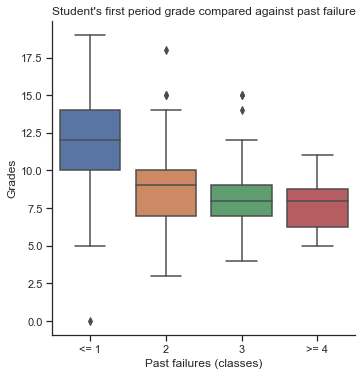

In [92]:
ax = sns.catplot(x="failures", y="G1", kind="box", data=student_merge)
plt.title("Student's first period grade compared against past failure")
plt.ylabel("Grades")
plt.xticks(ticks=range(4), labels=["<= 1", "2", "3", ">= 4"])
plt.xlabel("Past failures (classes)")

Text(0.5, 8.95999999999998, 'Taking higher education')

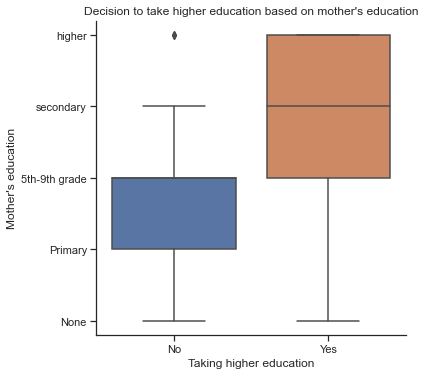

In [94]:
ax = sns.catplot(x="higher", y="Medu", kind="box", data=student_merge)
plt.title("Decision to take higher education based on mother's education")
plt.ylabel("Mother's education")
plt.yticks(ticks=range(5), labels=["None", "Primary", "5th-9th grade", "secondary", "higher"])
plt.xticks(ticks=range(2), labels=["No", "Yes"])
plt.xlabel("Taking higher education")

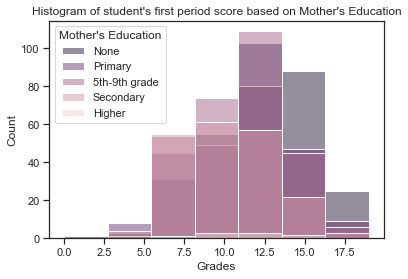

In [95]:
ax = sns.histplot(data=student_merge, x="G1", bins=7, hue="Medu")
plt.title("Histogram of student's first period score based on Mother's Education")
plt.xlabel("Grades")
plt.legend(title="Mother's Education", labels=["None", "Primary", "5th-9th grade", "Secondary", "Higher"])

Text(0.5, 0, "Mother's Education")

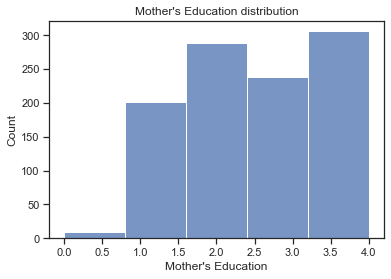

In [100]:
ax = sns.histplot(data=student_merge, x="Medu", bins=5)
plt.title("Mother's Education distribution")
plt.xlabel("Mother's Education")

Text(0.5, 0, "Father's Education")

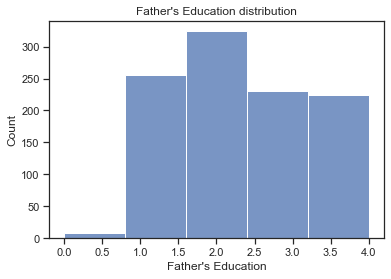

In [101]:
ax = sns.histplot(data=student_merge, x="Fedu", bins=5)
plt.title("Father's Education distribution")
plt.xlabel("Father's Education")

## Finding correlations between columns

Use Pearson correlation method to determine which fields correlates with each other

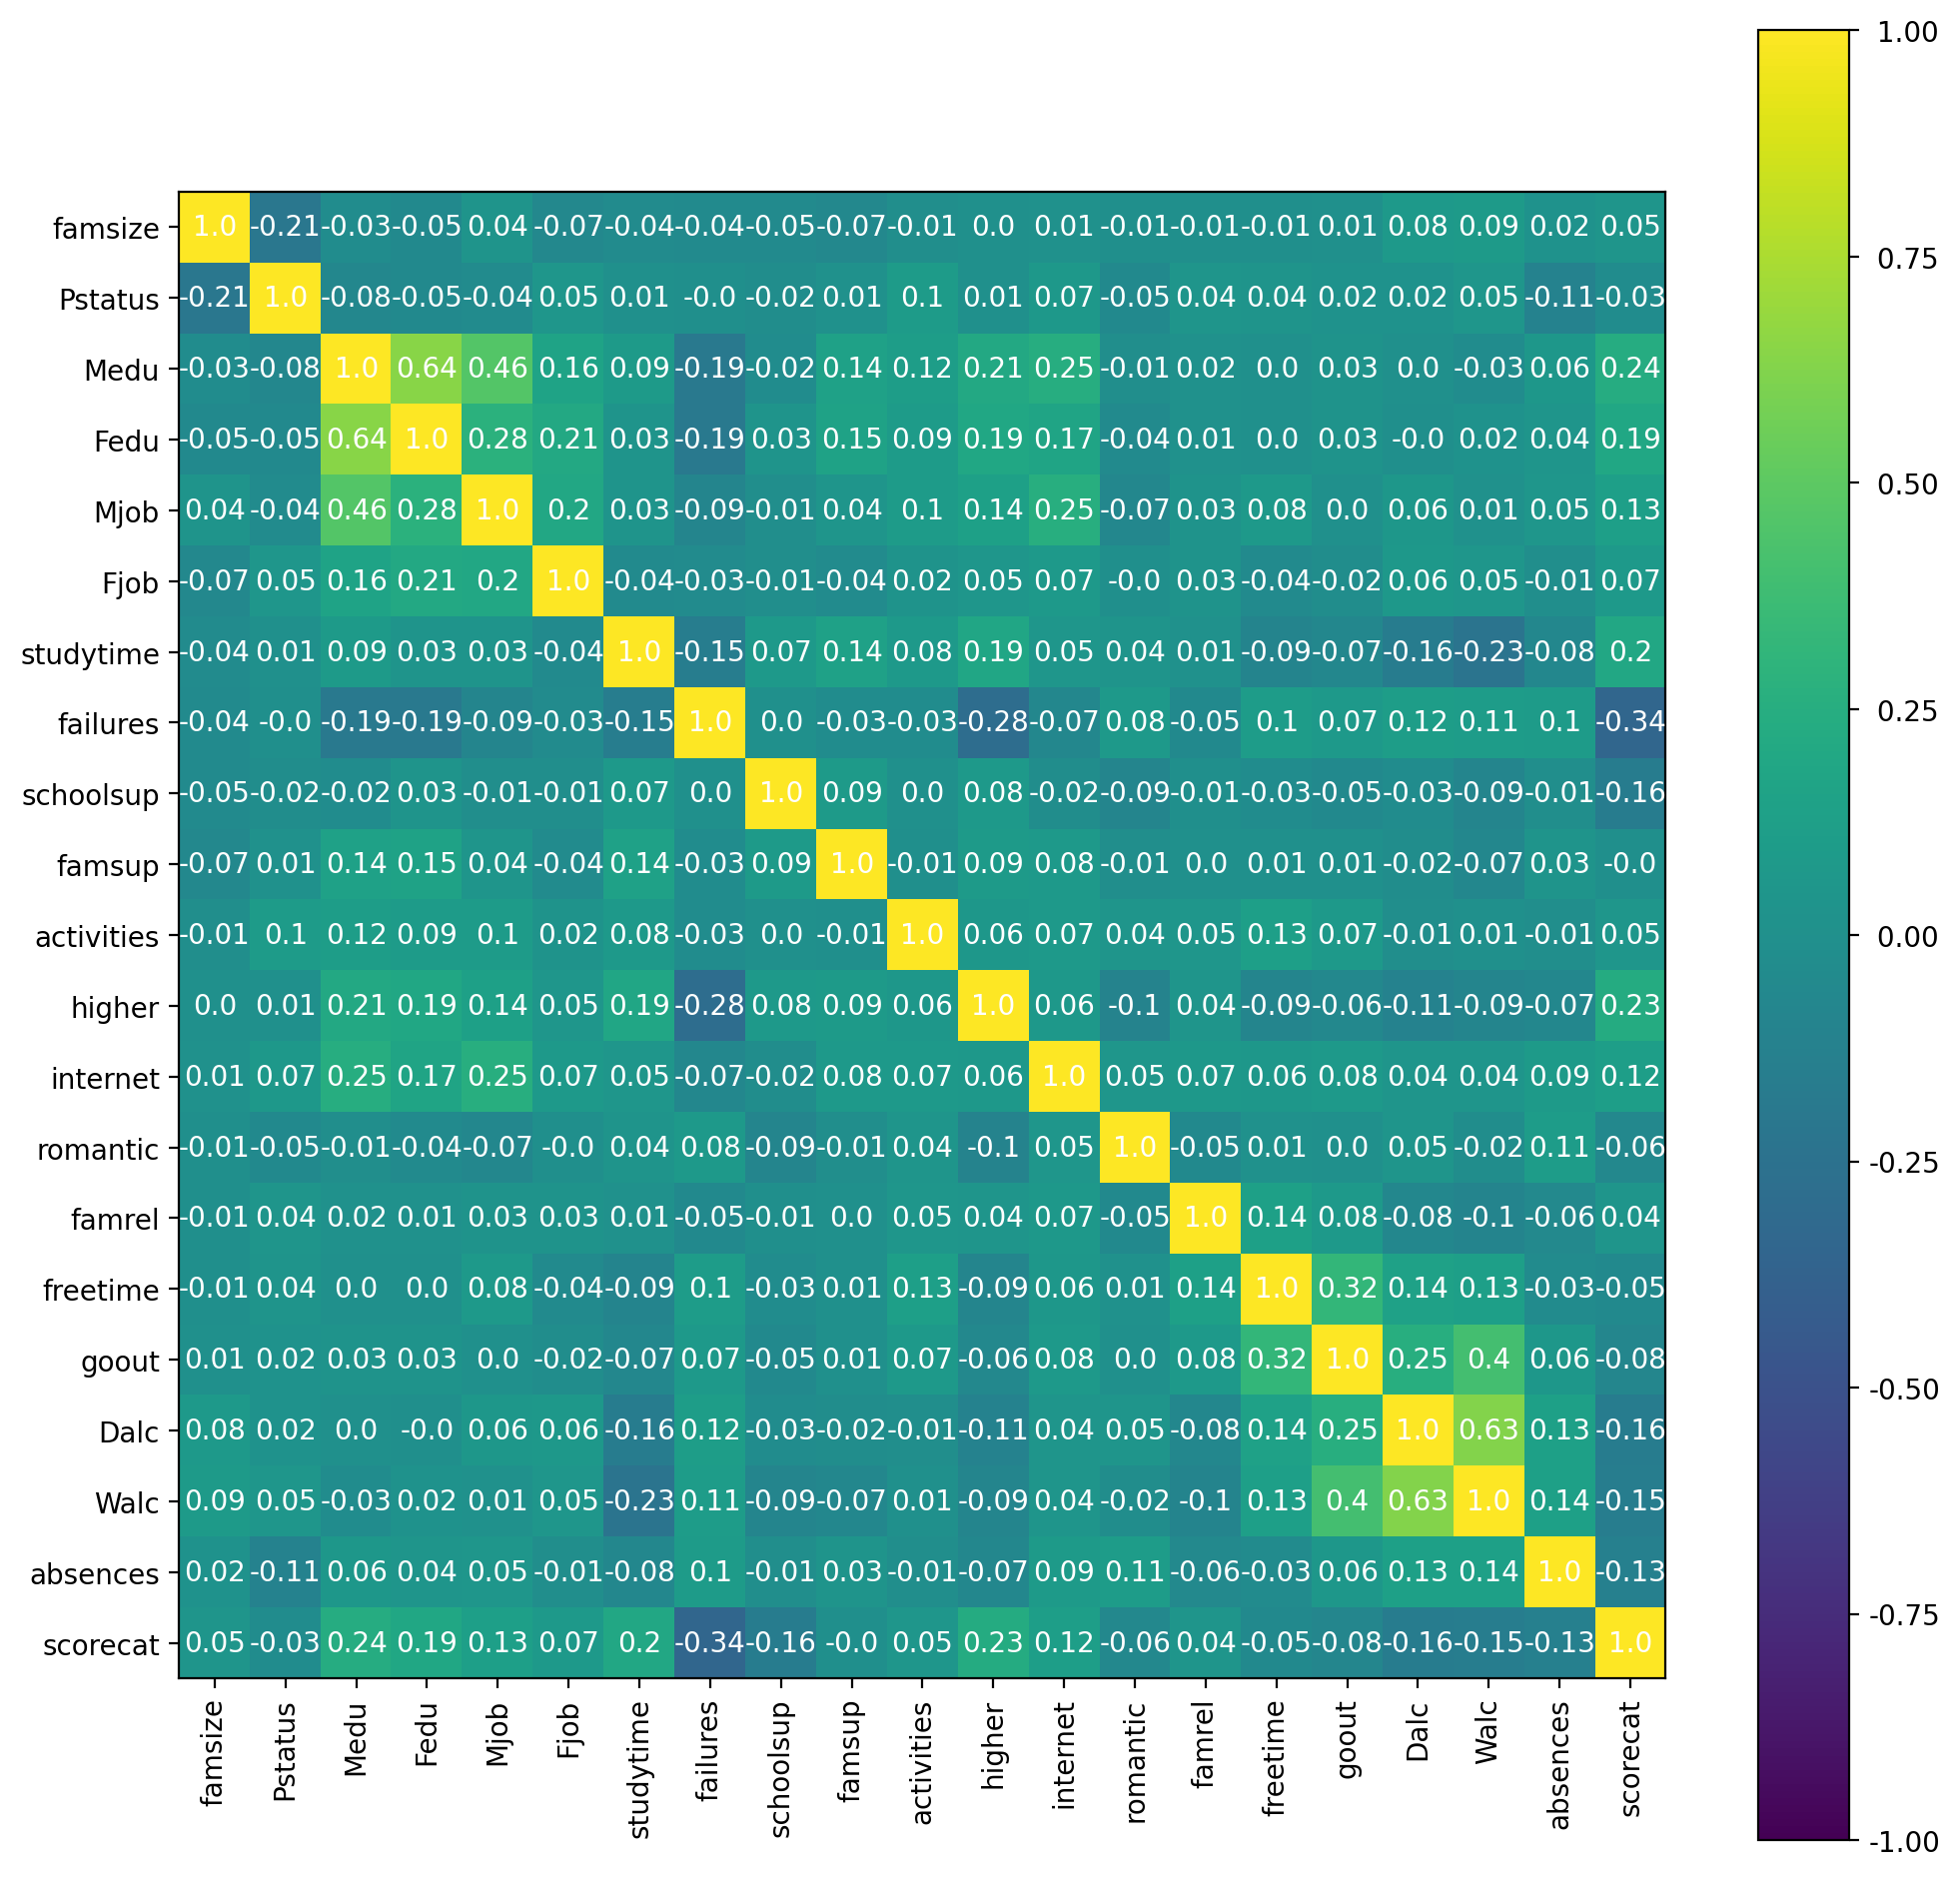

In [15]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

pearsonr(student_merge.famrel, student_merge.scorecat)

columns      = ["famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob",
                "studytime", "failures", "schoolsup", "famsup", "activities",
                "higher", "internet", "romantic", "famrel", "freetime", "goout",
                "Dalc", "Walc", "absences", "scorecat"]

corr_matrix = []

for col_x in columns:
    row = []
    for col_y in columns:
        corr, p_value = pearsonr(student_merge[col_x], student_merge[col_y])
        row.append(corr)
    corr_matrix.append(row)
    
fig, ax = plt.subplots(figsize=(12,12), dpi=200)
im = ax.imshow(corr_matrix)
im.set_clim(-1, 1)
ax.grid(False)
ax.xaxis.set(ticks=[x for x in range(len(columns))], ticklabels=columns)
ax.yaxis.set(ticks=[x for x in range(len(columns))], ticklabels=columns)
# plt.title("Correlation matrix of the external factors that may affect student's performance")
plt.xticks(rotation=90)
for i in range(len(columns)):
    for j in range(len(columns)):
        ax.text(j, i, np.around(corr_matrix[i][j], 2), ha='center', va='center',
                color='w')
cbar = ax.figure.colorbar(im, ax=ax, format='% .2f')
plt.show()


## Create predictive models to predict the correlation between the social factors students' score category
Before we implement the predictive models, we split the data into 70% train data and 30% test data. The parameter `random_state=100` defines the seed of the randomizer, so we will get the same results on every run.

Naive Bayes accuracy: 0.17834394904458598
              precision    recall  f1-score   support

           1      0.625     0.152     0.244        99
           2      0.000     0.000     0.000       144
           3      0.149     0.953     0.257        43
           4      0.000     0.000     0.000        28

    accuracy                          0.178       314
   macro avg      0.193     0.276     0.125       314
weighted avg      0.217     0.178     0.112       314

Decision Tree accuracy: 0.4585987261146497
              precision    recall  f1-score   support

           1      0.472     0.343     0.398        99
           2      0.469     0.743     0.575       144
           3      0.250     0.070     0.109        43
           4      0.000     0.000     0.000        28

    accuracy                          0.459       314
   macro avg      0.298     0.289     0.271       314
weighted avg      0.398     0.459     0.404       314



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


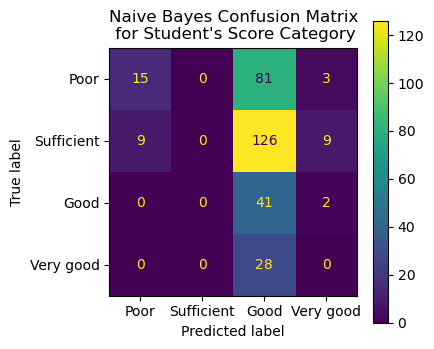

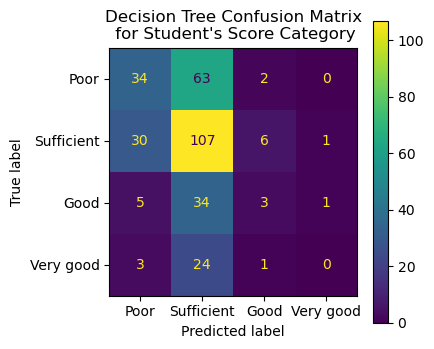

In [17]:
from sklearn.model_selection import train_test_split

# Predictor columns and label column
feature_cols = ["Medu", "Fedu", "studytime", "higher"]
label_col = "scorecat"
scorecat_labels=["Poor", "Sufficient", "Good", "Very good"]

# Split train and test data
predictor = student_merge[feature_cols]
label = student_merge[label_col]
x_train, x_test, y_train, y_test = train_test_split(predictor, label, test_size=0.3, random_state=100)

# Create Predictive Models
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Naive Bayes
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

# Decision Tree
dtc = DecisionTreeClassifier()
y_pred_dtc = dtc.fit(x_train, y_train).predict(x_test)


# Calculate Predictive Model Performance

# Accuracy, precision, recall, and F1 score
print("Naive Bayes accuracy:", metrics.accuracy_score(y_test, y_pred_gnb))
print(metrics.classification_report(y_test, y_pred_gnb, digits=3))

print("Decision Tree accuracy:", metrics.accuracy_score(y_test, y_pred_dtc))
print(metrics.classification_report(y_test, y_pred_dtc, digits=3))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Naive Bayes Confusion Matrix\n for Student's Score Category")
metrics.plot_confusion_matrix(gnb, x_test, y_test, display_labels=scorecat_labels, ax=ax)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Decision Tree Confusion Matrix\n for Student's Score Category")
metrics.plot_confusion_matrix(dtc, x_test, y_test, display_labels=scorecat_labels, ax=ax)

## Create predictive models to predict the correlation between the social factors students' past failures
The Pearson correlation matrix above shows that there are a strong negative correlation between students' past failures with their decision to take higher education. Followed by mother's education, father's education, and study time.

Naive Bayes accuracy: 0.8152866242038217
              precision    recall  f1-score   support

           0      0.859     0.969     0.910       257
           1      0.357     0.143     0.204        35
           2      0.000     0.000     0.000        11
           3      0.200     0.182     0.190        11

    accuracy                          0.815       314
   macro avg      0.354     0.323     0.326       314
weighted avg      0.750     0.815     0.775       314

Decision Tree accuracy: 0.821656050955414
              precision    recall  f1-score   support

           0      0.841     0.984     0.907       257
           1      0.364     0.114     0.174        35
           2      0.000     0.000     0.000        11
           3      0.500     0.091     0.154        11

    accuracy                          0.822       314
   macro avg      0.426     0.297     0.309       314
weighted avg      0.746     0.822     0.767       314



/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


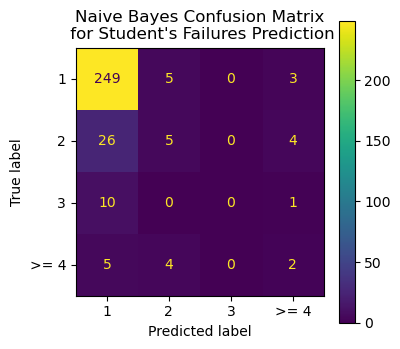

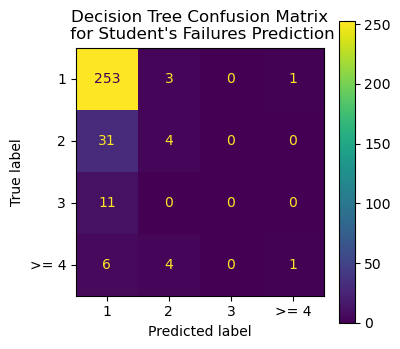

In [18]:
from sklearn.model_selection import train_test_split

# Predictor columns and label column
feature_cols = ["Medu", "Fedu", "studytime", "higher"]
label_col = "failures"
scorecat_labels = ["Poor", "Sufficient", "Good", "Very good"]

# Split train and test data
predictor = student_merge[feature_cols]
label = student_merge[label_col]
x_train, x_test, y_train, y_test = train_test_split(predictor, label, test_size=0.3, random_state=100)

# Create Predictive Models
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Naive Bayes
gnb = GaussianNB()
y_pred_gnb = gnb.fit(x_train, y_train).predict(x_test)

# Decision Tree
dtc = DecisionTreeClassifier()
y_pred_dtc = dtc.fit(x_train, y_train).predict(x_test)


# Calculate Predictive Model Performance

# Accuracy, precision, recall, and F1 score
print("Naive Bayes accuracy:", metrics.accuracy_score(y_test, y_pred_gnb))
print(metrics.classification_report(y_test, y_pred_gnb, digits=3))

print("Decision Tree accuracy:", metrics.accuracy_score(y_test, y_pred_dtc))
print(metrics.classification_report(y_test, y_pred_dtc, digits=3))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Naive Bayes Confusion Matrix\n for Student's Failures Prediction")
metrics.plot_confusion_matrix(gnb, x_test, y_test, display_labels=["1", "2", "3", ">= 4"], ax=ax)

fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
plt.title("Decision Tree Confusion Matrix\n for Student's Failures Prediction")
metrics.plot_confusion_matrix(dtc, x_test, y_test, display_labels=["1", "2", "3", ">= 4"], ax=ax)

[861, 30, 33, 120]


Text(0.5, 0, 'Number of failures')

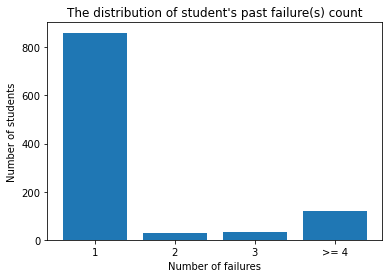

In [19]:
x = ["1", "2", "3", ">= 4"]
height = [len(student_merge.failures.loc[student_merge.failures == x]) for x in student_merge.failures.unique()]
print(height)
plt.bar(x, height)
plt.title("The distribution of student's past failure(s) count")
plt.ylabel("Number of students")
plt.xlabel("Number of failures")

## Create decision tree visualization
Generate decision tree visualization using Graphviz. The library can be obtained using `pip`. The Graphviz binary needs to be installed as well, which is available on the website or using a package manager.

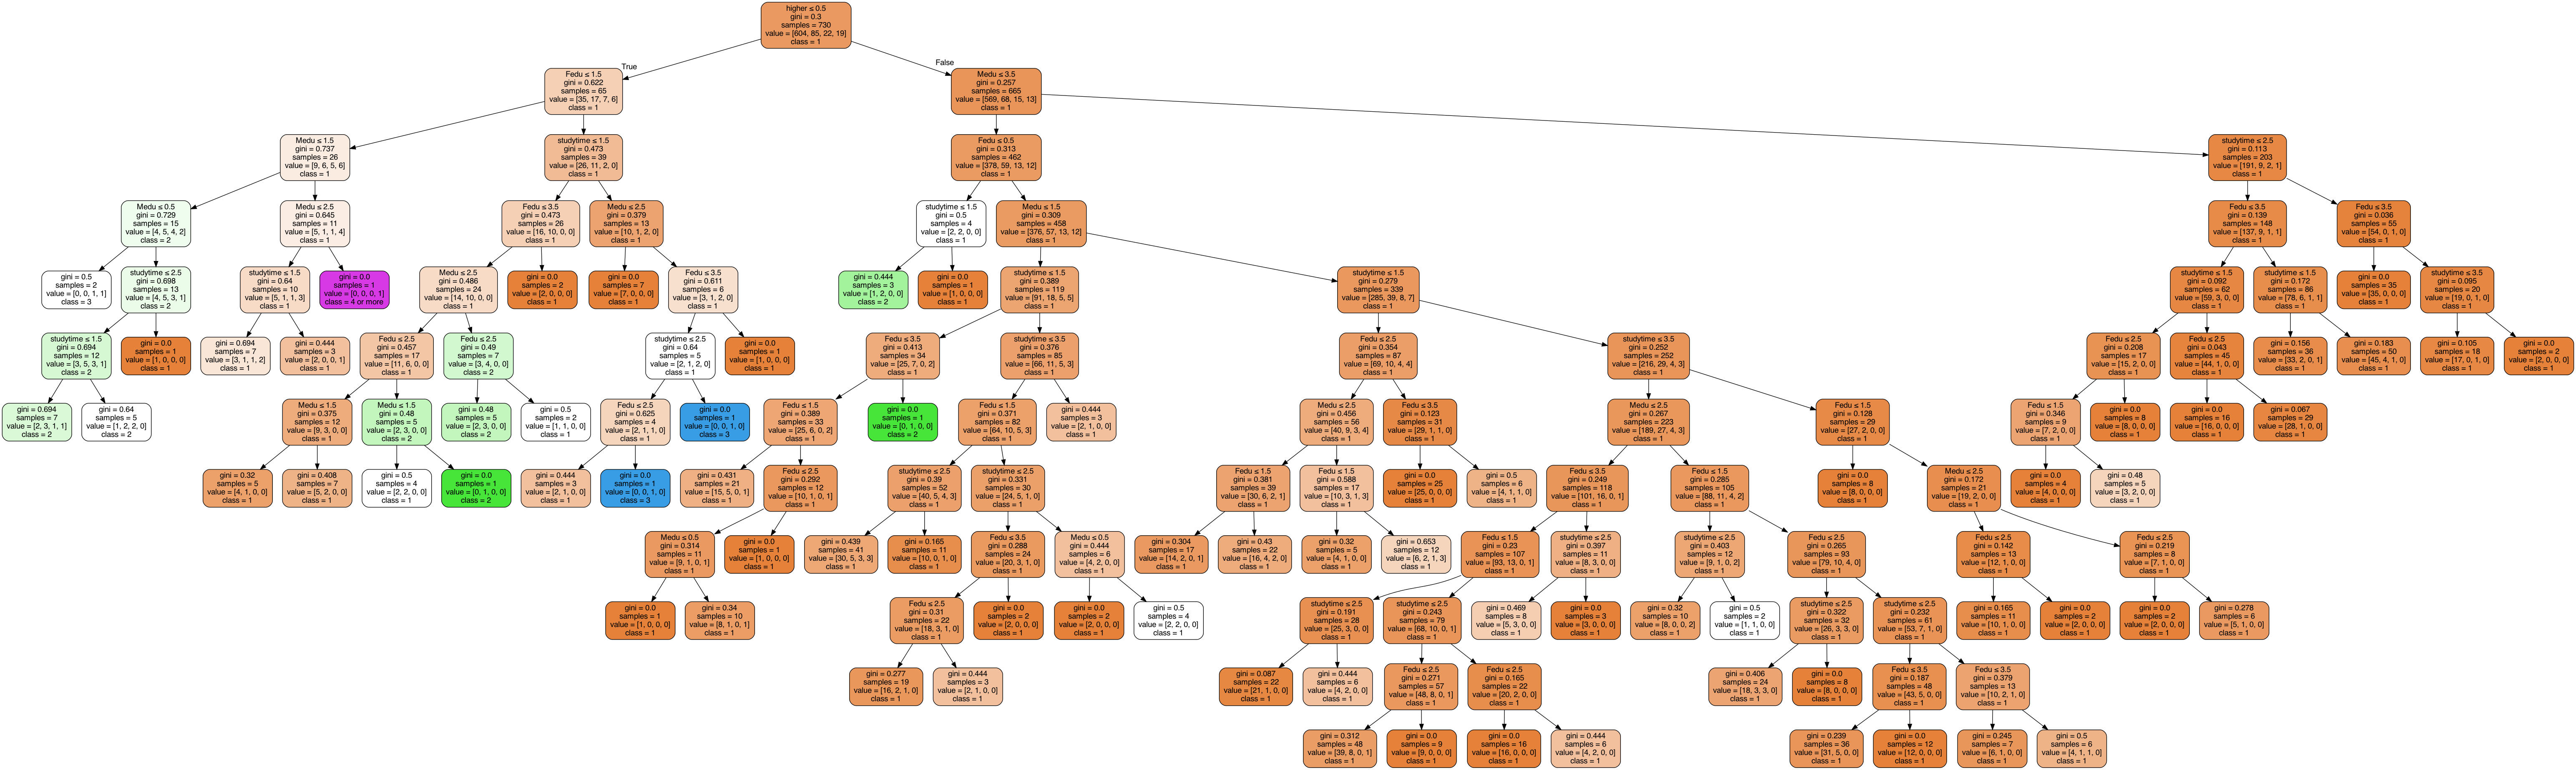

In [20]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(dtc, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names=feature_cols,
                class_names=("1", "2", "3", "4 or more")
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('test.png')
Image(graph.create_png())